# 상가(상권)정보 분석하기
* 데이터 출처: https://www.data.go.kr/dataset/15012005/fileData.do
* 소상공인 상권정보 상가업소 데이터

## 데이터셋을 엑셀에서 열어보는 방법

MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   

## 데이터셋 분류 지역

``` 

### 데이터셋 분류 지역
※ 파일데이터 분류 지역  1 : 서울, 부산 2 : 대구, 인천, 광주, 대전, 울산 3 : 경기, 강원, 충북 4 : 충남, 전북, 전남, 경북, 경남, 제주 ```

# 라이브러리 로드

In [7]:
# 라이브러리를 로드합니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 설정

In [9]:
# 한글폰트를 설정합니다.

plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [15]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 한글폰트 설정 확인

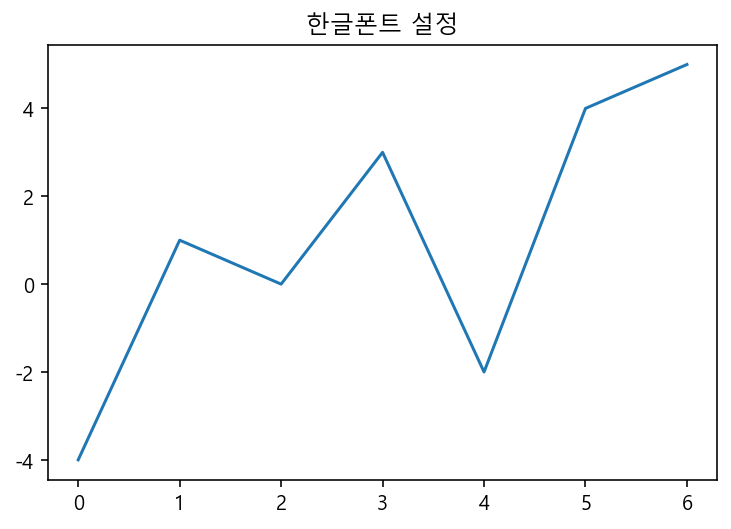

In [16]:
pd.Series([-4,1,0,3,-2,4,5]).plot(title="한글폰트 설정")

# 파일로드

In [18]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F44C-CBDA

 C:\Users\LG\Documents\GitHub\Data_Analysis\data 디렉터리

2020-05-02  오후 05:13    <DIR>          .
2020-05-02  오후 05:13    <DIR>          ..
2020-05-02  오후 05:12            57,732 seoul_municipalities_geo_simple.json
2020-05-02  오후 05:10       264,920,940 상가업소정보_201912_01.csv
2020-04-30  오후 03:27           168,798 주택도시보증공사_전국 평균 분양가격(2020년 2월).csv
2020-04-30  오후 03:33             2,163 지역별 3.3㎡당 평균 분양가격(천원)_15.8월.csv
               4개 파일         265,149,633 바이트
               2개 디렉터리   6,931,640,320 바이트 남음


In [22]:
# 파일을 로드합니다.

df=pd.read_csv("data/상가업소정보_201912_01.csv",sep='|')
df.shape

(573680, 39)

In [23]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 저장합니다.

pd.options.display.max_columns = 39

# 미리보기

## head,tail

In [24]:
# head 로 미리보기를 합니다.

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [25]:
# tail 로 미리보기를 합니다.

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


## 인덱스 정보 보기

In [26]:
df.index

RangeIndex(start=0, stop=573680, step=1)

## 컬럼명만 보기

In [27]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## info

In [28]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 데이터 타입 보기

In [29]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# 결측치 확인하기

In [31]:
True == 1

True

In [34]:
# 결측치 구해서 n 이라는 변수에 담고 재사용 합니다.

n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

## 결측치 시각화

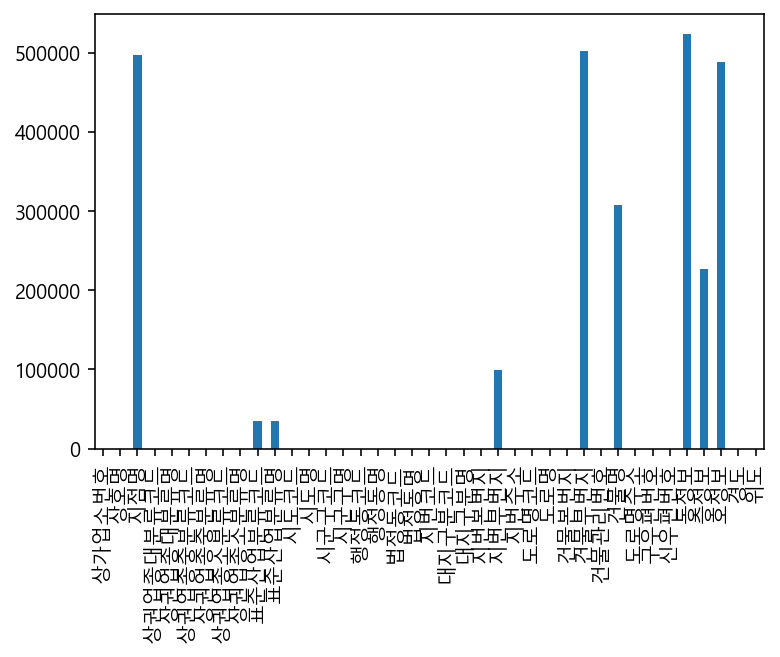

In [38]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

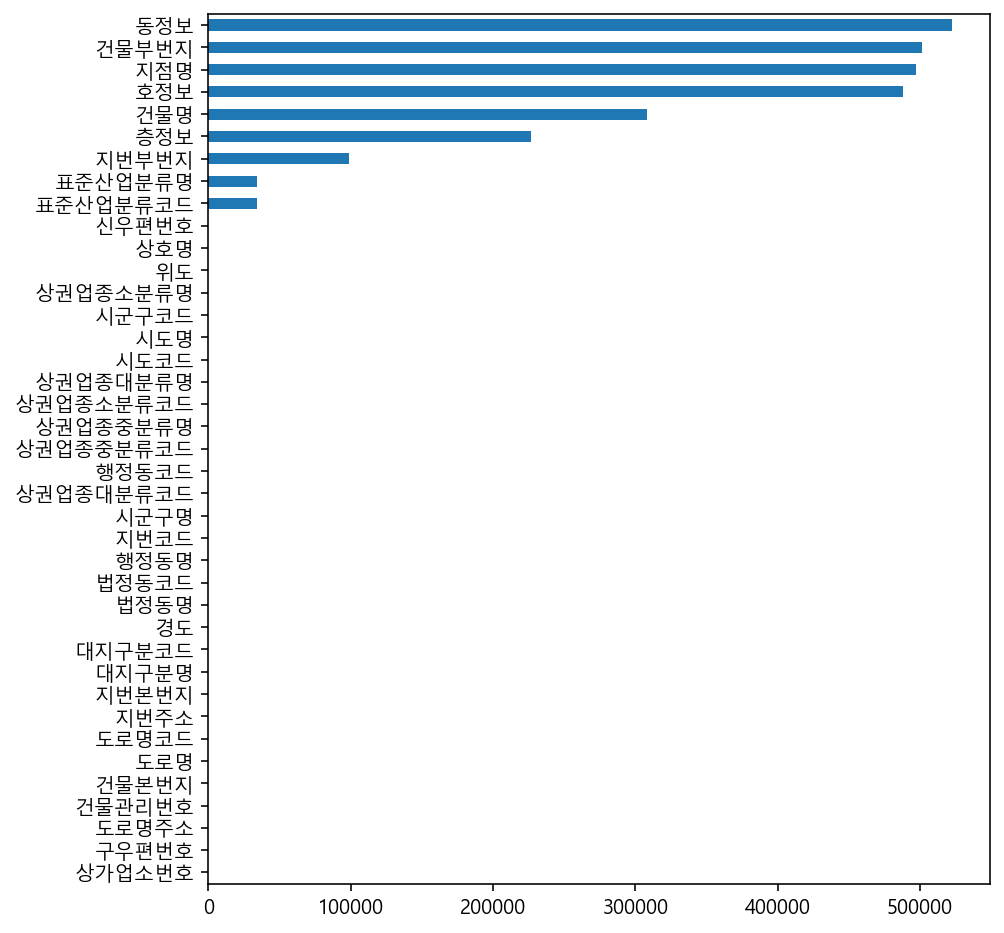

In [41]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(7,8))

## missingno 로 결측치 시각화 하기

* 별도의 설치가 필요한 라이브러리 입니다.
* ResidentMario/missingno: Missing data visualization module for Python.
* anaconda prompt 를 열어서 설치해 주세요.
* 윈도우로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
* conda install -c conda-forge missingno
* conda install -c conda-forge/label/gcc7 missingno
* conda install -c conda-forge/label/cf201901 missingno

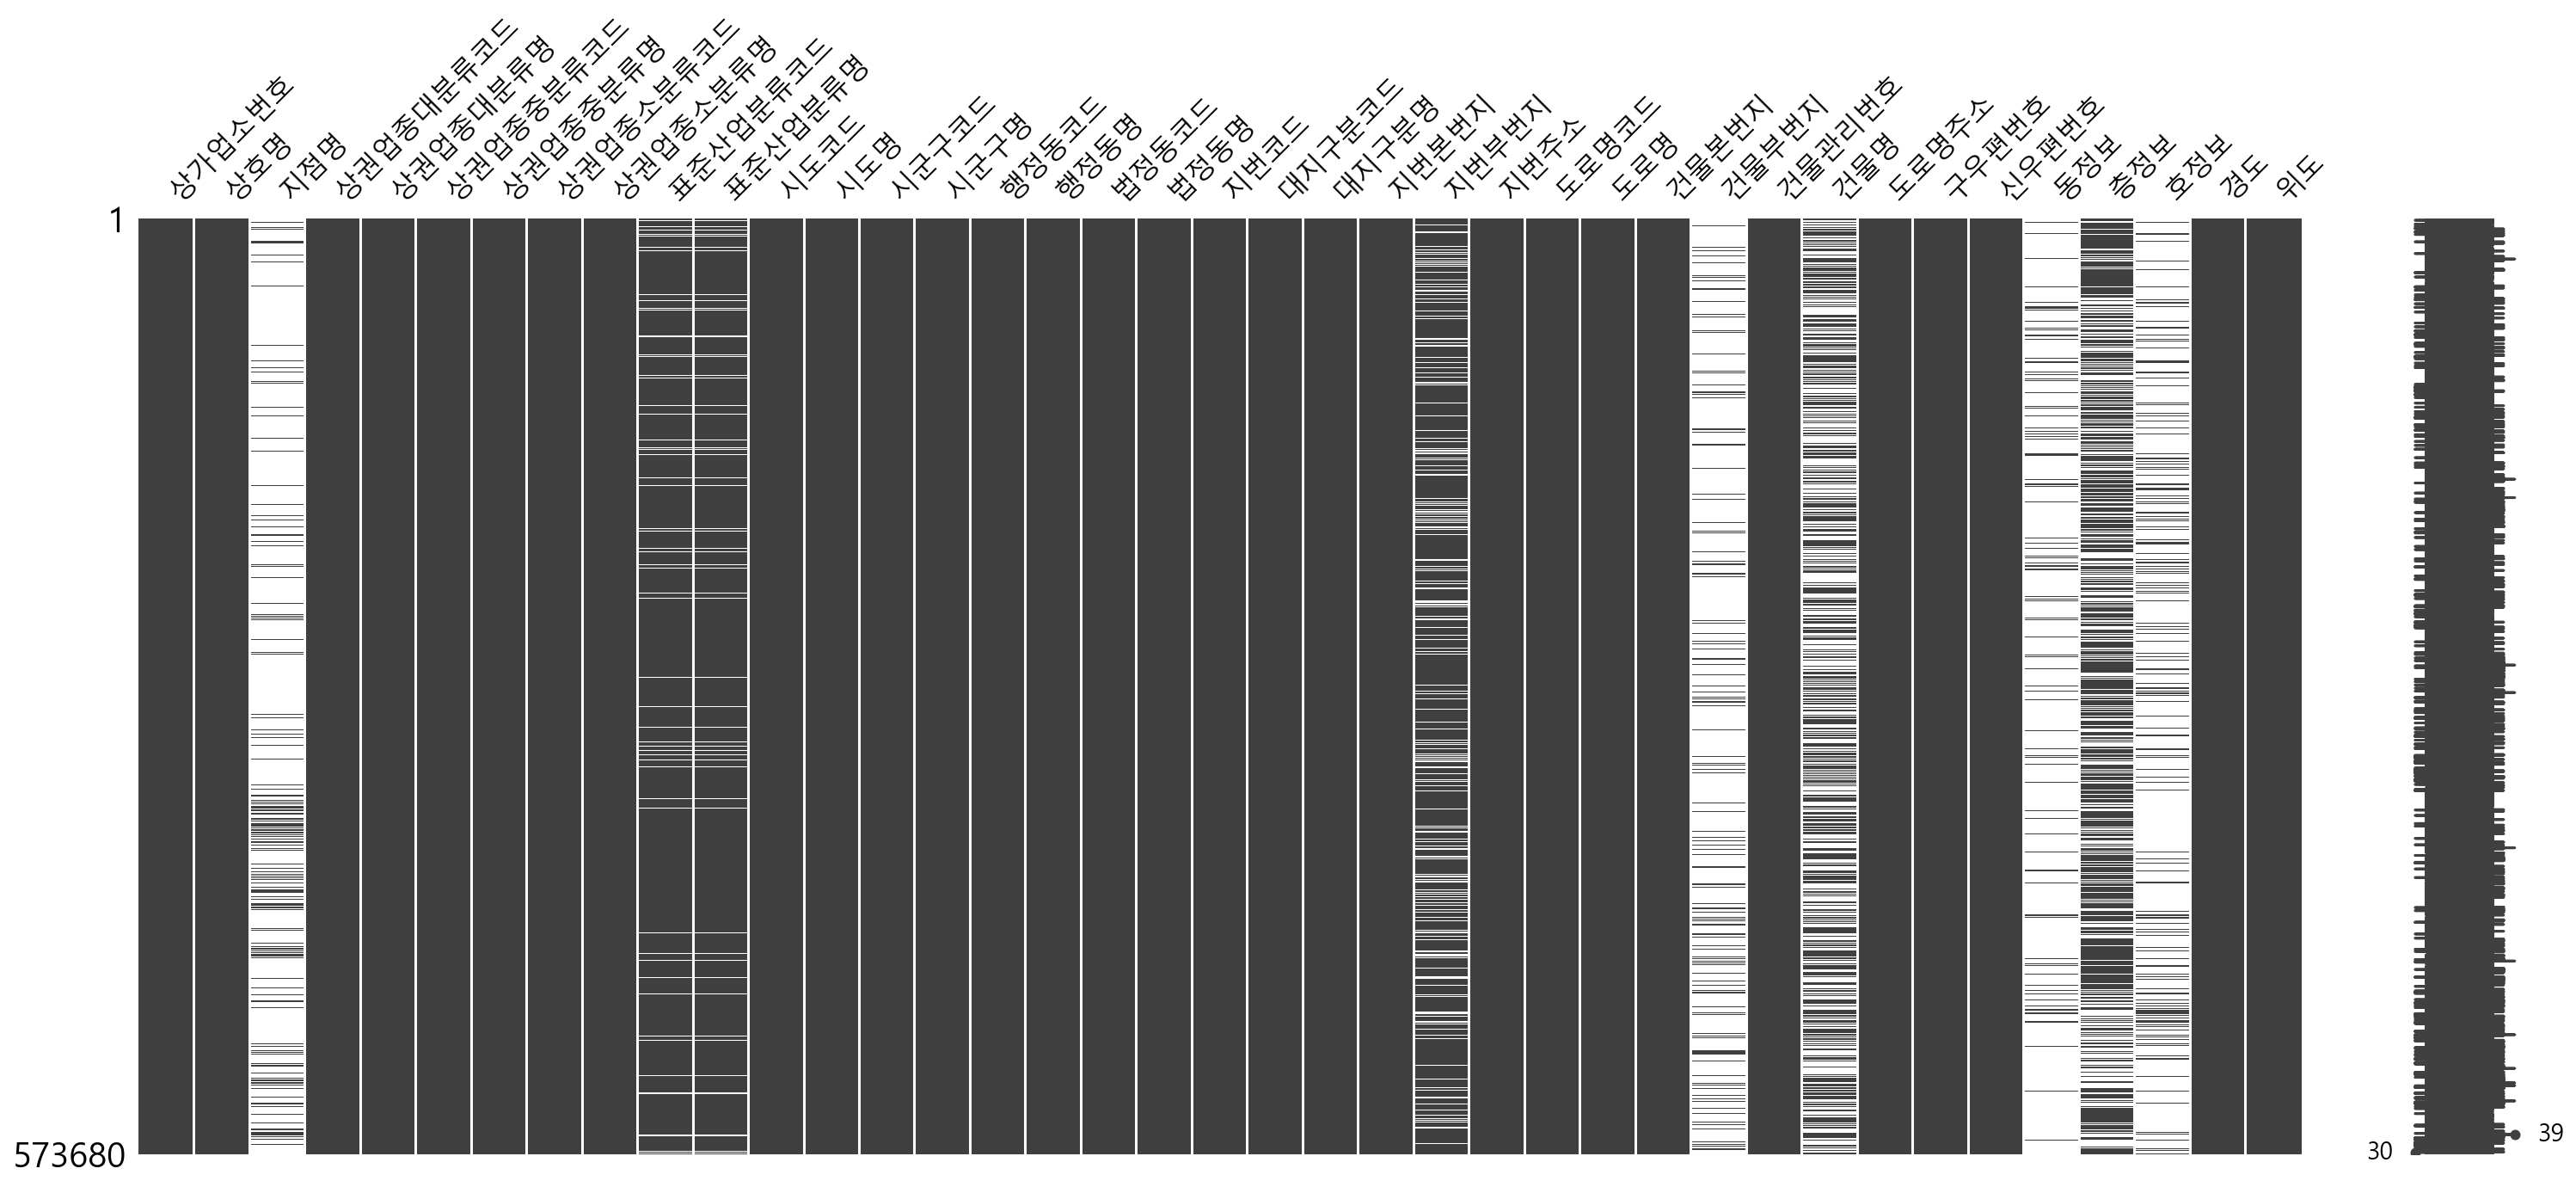

In [43]:
import missingno as msno

msno.matrix(df)

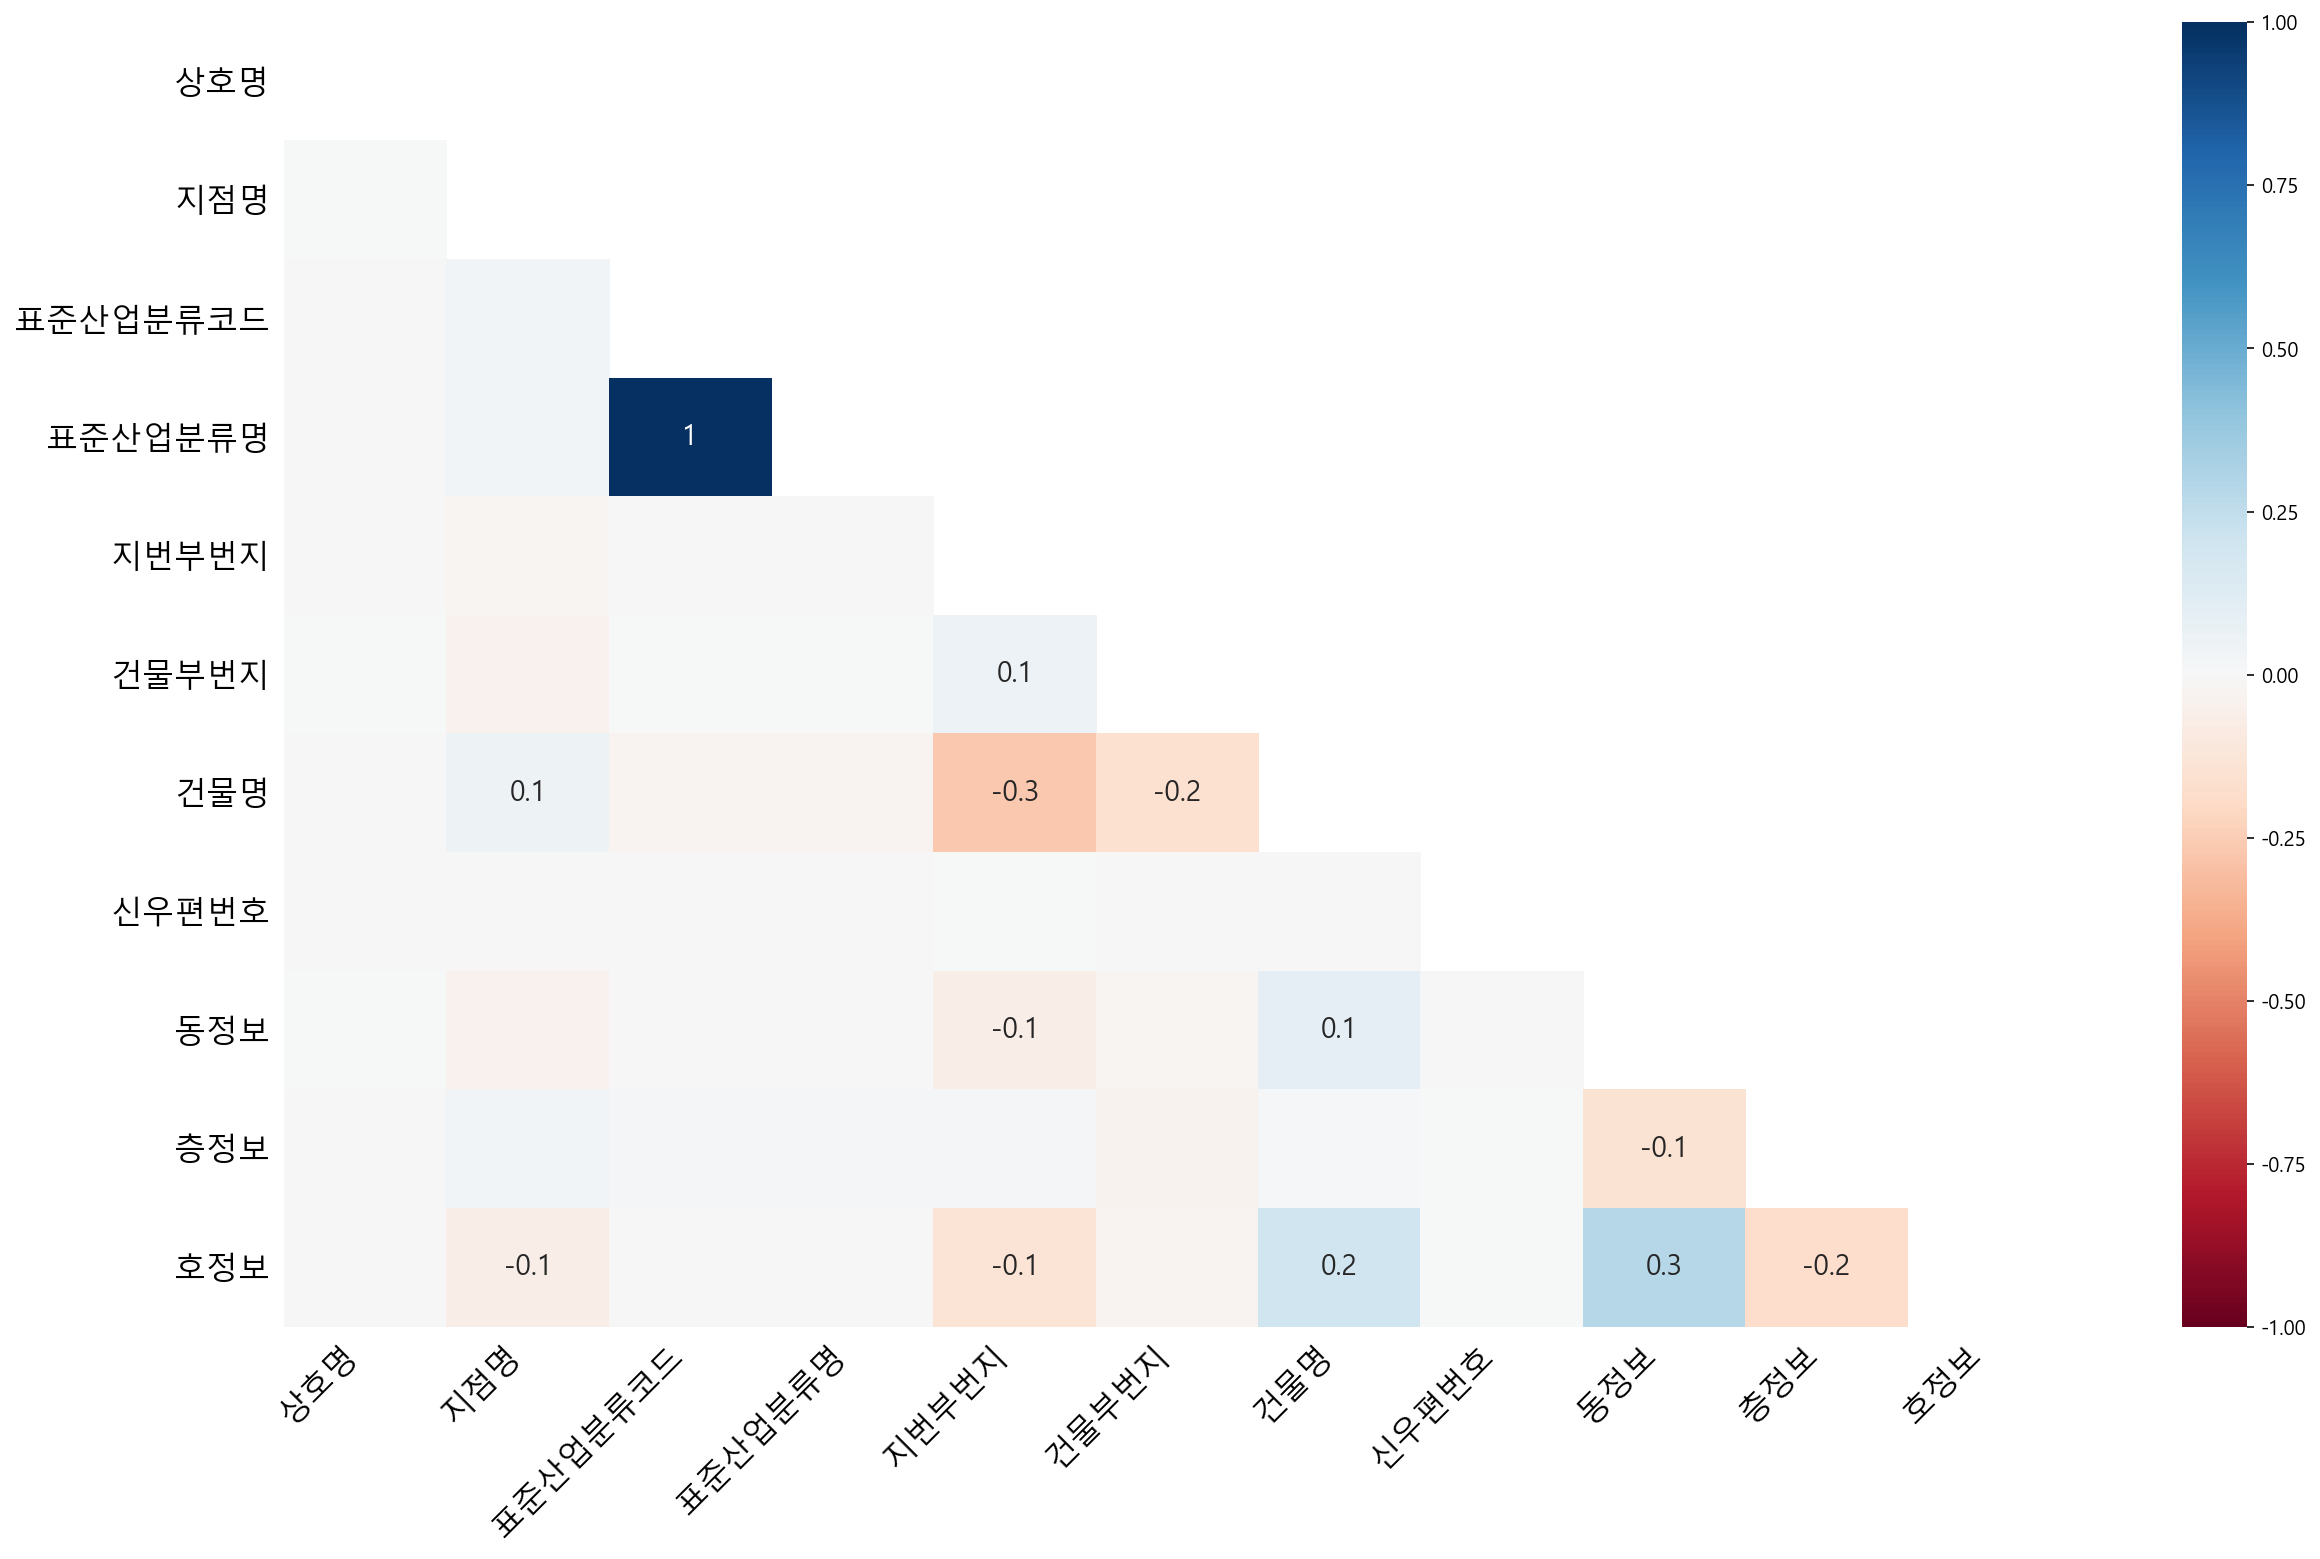

In [45]:
# heatmap 으로 표현합니다.

msno.heatmap(df)

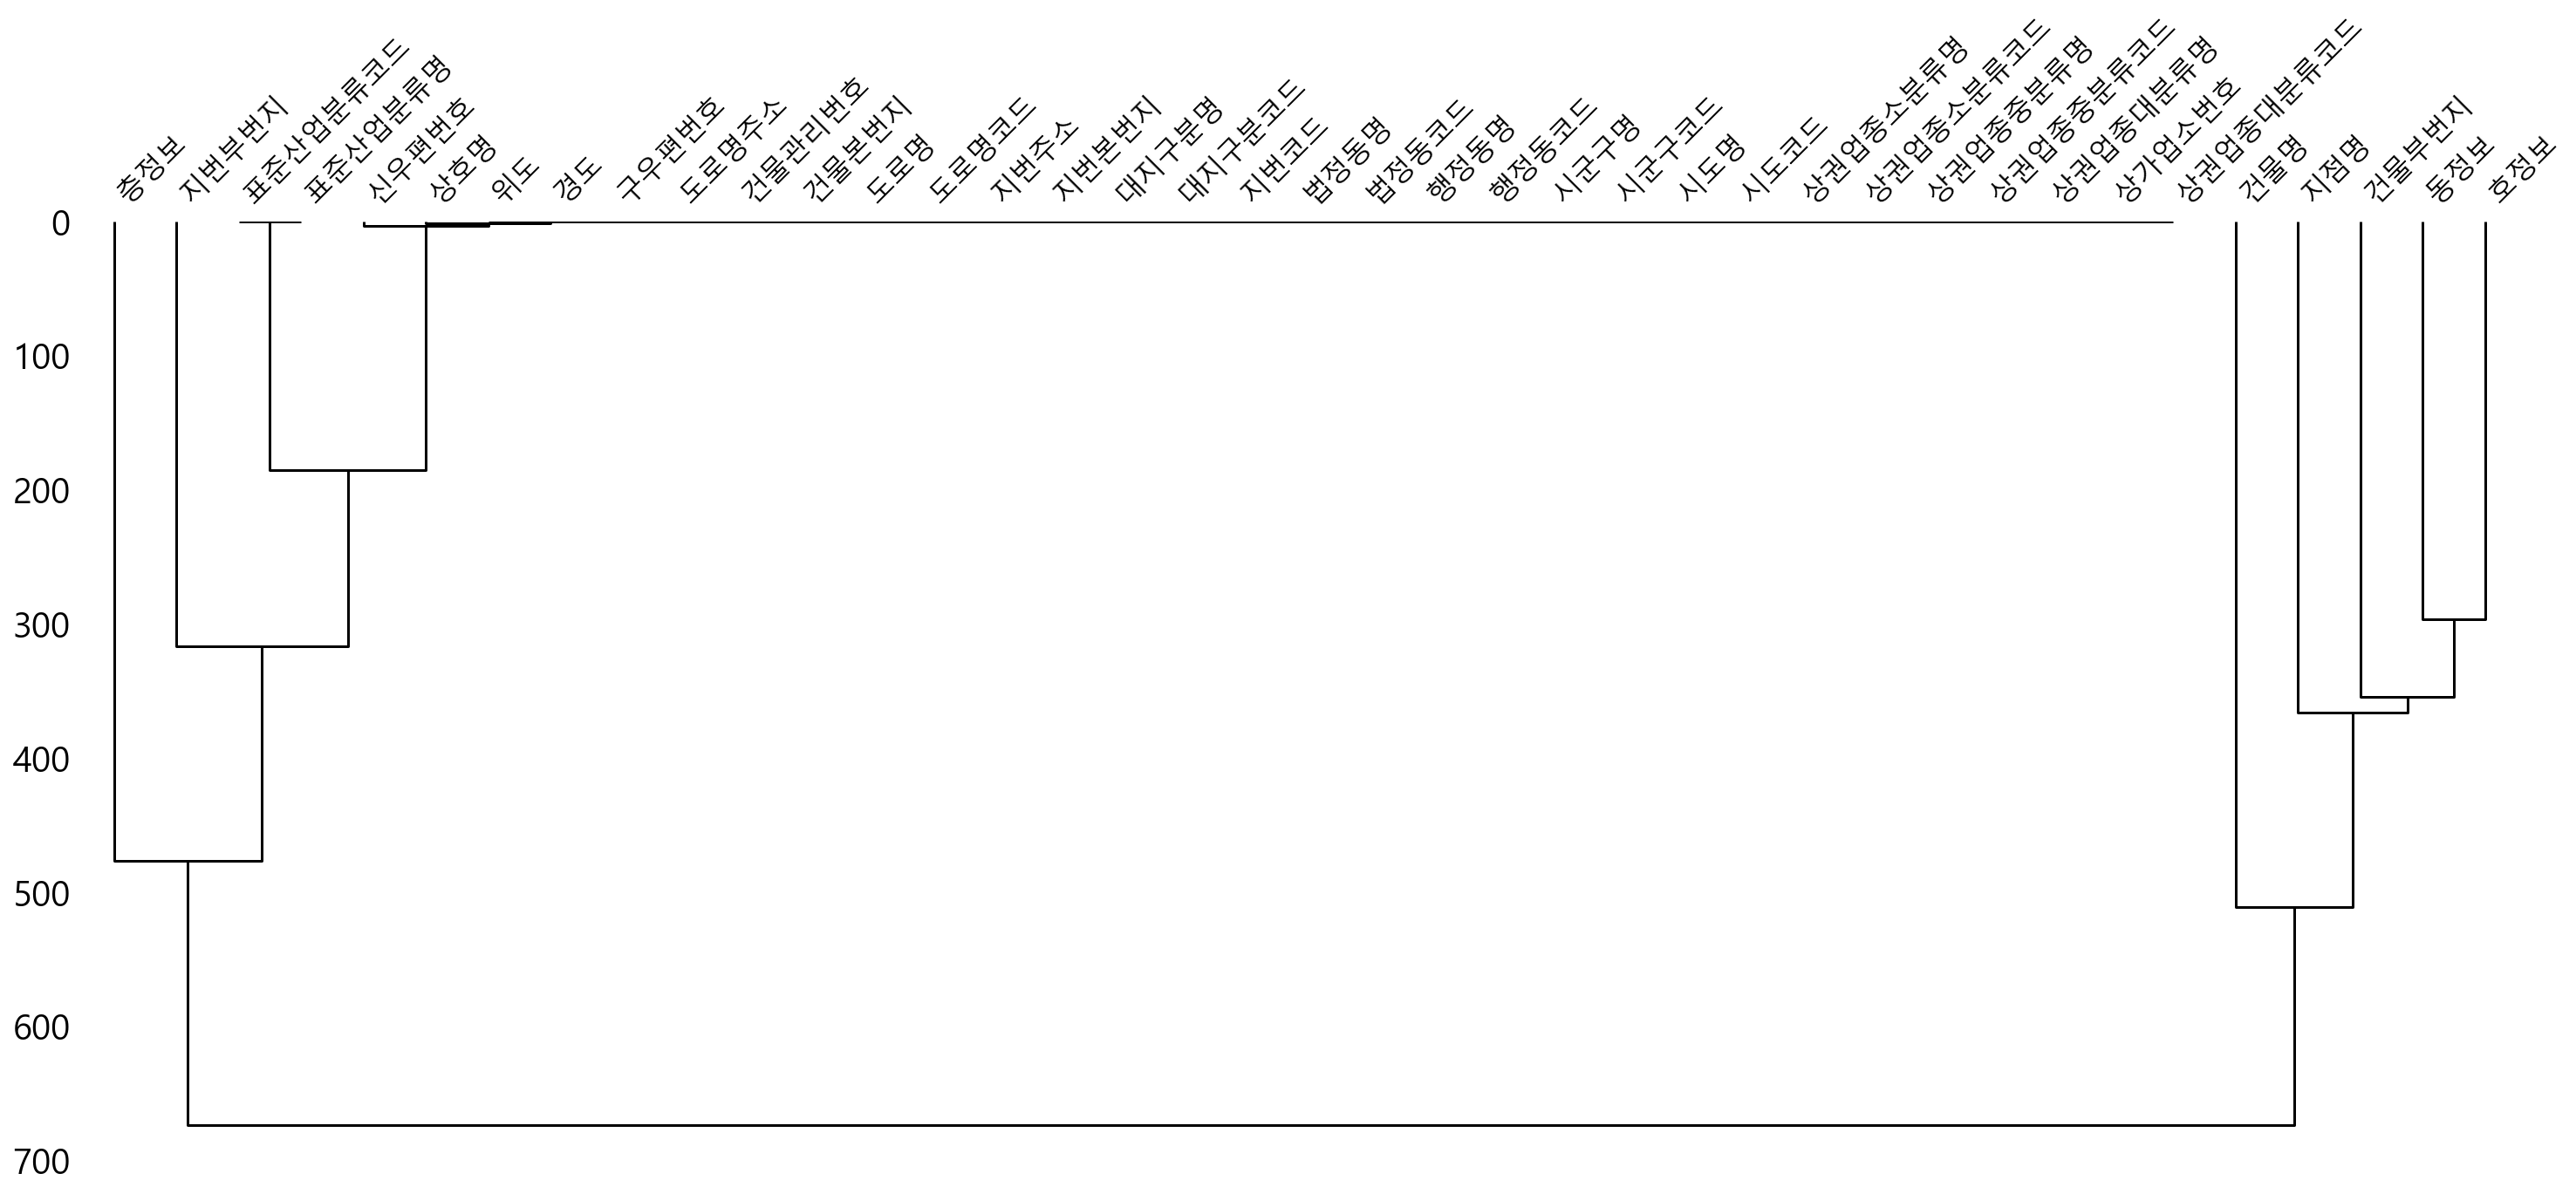

In [46]:
# dendrogram 으로 표현합니다.

msno.dendrogram(df)

# 사용하지 않는 컬럼 제거하기

## 결측치가 너무 많은 컬럼 제거하기

In [53]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [56]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col,axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [57]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

## 사용하지 않는 컬럼 제거하기

In [60]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [64]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.

cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [65]:
# "코드", "번호" 가 들어있는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
# 제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code,axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [66]:
# info 를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


# 행,열을 기준으로 값을 가져오기

## 열(column)기준

* df[열이름]
* 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
* 결과가 Pandas 의 DataFrame 형태로 반환
* 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [77]:
# "상호명" 컬럼만 가져옵니다.

df["상호명"].head()

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
3         싱싱커피&토스트
4         가락사우나내스낵
Name: 상호명, dtype: object

In [78]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.

df[["상호명","도로명주소"]].head()

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71


## 행(row) 기준

* df.loc[행]
* df.loc[행, 열]
* df.loc[행이름 혹은 번호]
* 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
* 결과가 Pandas 의 DataFrame 형태로 반환
* 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [79]:
# 0 번째 인덱스 행을 가져옵니다.

df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [80]:
# 0, 1, 2 번째 인덱스 행을 가져옵니다.

df.loc[[0,1,2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [83]:
# 0 번째 행의 "상호명"을 가져옵니다.

# df.loc[0]["상호명"]
df.loc[0,"상호명"]

'와라와라호프'

In [84]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.

df.loc[[0,1,2],"상호명"]

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
Name: 상호명, dtype: object

In [86]:
# 0,1, 2, 번째 행의 "상호명", "도로명주소"를 가져옵니다.

df.loc[[0,1,2],["상호명","도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


## iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다.
* 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
* 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
* 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
* 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
* 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [88]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.

df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [91]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.

df.iloc[-5:,-5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099
